<a href="https://colab.research.google.com/github/unknown-jun/Basic_of_Python/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀
종속변수가 범주형인 경우에 적용되는 회귀분석 모형

<br>

회귀분석 종류
1. 단순회귀 분석 ---> 종속변수가 연속형 수치 데이터
2. 다항회귀 분석 ---> 종속변수가 연속형 수치 데이터
3. 다중회귀 분석 ---> 종속변수가 연속형 수치 데이터
4. 로지스틱 회귀 분석 ---> 종속변수가 범주형인 데이터

머신러닝 데이터 분석을 위한 단계

1. 데이터 불러오기
2. 데이터 탐색 및 전처리  -> 결측치 처리
3. 데이터 정규화 또는 표준화 -> 이상치에 민감하지 않도록 단위를 일정하게 조정
4. 범주형 데이터에 대해 더미변수(인코딩) 생성
5. 훈련데이터와 테스트 데이터 분할
6. 머신러닝 모델 생성
7. 훈련데이터로 머신러닝 모델을 훈련
8. 머신러닝 모델 평가
9. 머신러닝 모델 성능 개선

결측치 처리
<br>
- 머신러닝 데이터 분석의 정확도는 분석 데이터의 품질에 의해 좌우된다.  
- 데이터 품질을 높이기 위해서는 누락 데이터 처리, 중복 데이터 처리 등 오류를 수정하고 분석 목적에 맞게 변형하는 과정이 필요하다.  
- 데이터 프레임에는 원소 데이터 값이 종종 누락되는 경우가 있다.  
- 일반적으로 데이터 값이 존재하지 않는 누락 데이터를 NaN으로 표시한다.  
- 머신러닝 분석 모형에 데이터를 입력하기 전에 반드시 누락 데이터를 제거하거나 다른 적절한 값으로 대체하는 과정이 필요하다.  
- 누락 데이터가 많아지면 데이터의 품질이 떨어지고 머신러닝 분석 알고리즘을 왜곡하는 현상이 발생하기 때문이다.  

<br> 

1. 누락 데이터를 찾는 함수<br>
    1.1 isnull( ): 누락데이터면 True를 반환하고, 누락 데이터가 아니면 False를 반환하는 함수<br>
    1.2 notnull( ): 누락데이터가 아니면 True를 반환하고, 누락 데이터이면 False를 반환합니다.

2. 누락 데이터를 제거하는 함수<BR>
    2.1 열을 삭제한다.
    ~~~
    import seaborn as sns
    tat= sns.load_dataset('titanic')
    tat.dropna( axis = 1, thresh=500, inplace=True)
    # 누락데이터(NaN)이 500개 이상이면 열을 삭제한다.
    # inplace=True를 사용하면 원본(tat)에서 삭제한다.
    ~~~
    2.2 행을 삭제한다.
    ~~~
    import seaborn as sns
    tat= sns.load_dataset('titanic')
    tat.deck.dropna(axis = 0, thresh=500)
    tat2.columns()
    ~~~

3. 누락 데이터를 다른 데이터로 치환하는 함수<br>
    3.1 평균값으로 누락 데이터를 바꾸기  
    ~~~
    import seaborn as sns
    tat = sns.load_dataset('titanic')
    mean_age = tat['age'].mean()
    print(mean_age) # 29.69
    tat['age'].fillna(mean_age, inplace=True)
    ~~~
    3.2 최빈값으로 누락 데이터를 바꾸기  
    3.3 이웃하고 있는 주변의 데이터로 누락 데이터를 바꾸기 <br>
    ~~~
    문법: df[ 'age' ].fillna( method = 'ffill' ,  inplace = True )
    
    import seaborn as sns
    tat = sns.load_dataset('titanic')
    
    tat[ 'deck' ].fillna( method = 'ffill', inplace = True ) # 결측치 아래의 데이터로 채워넣는다.
    tat[ 'deck' ].fillna( method = 'bfill', inplace = True ) # 결측치 위의 데이터로 채워넣는다.
    ~~~ 
    3.4 누락데이터가 아닌 데이터에 대한 회귀 예측값으로 누락 데이터를 바꾸기

데이터 표준화

- 실무에서 접하는 데이터 셋은 다양한 사람들의 손에 거쳐서 만들어진다
- 여러곳에 수집한 자료들은 대소문자 구분, 약칭 활용 등 여러가지 원인에 의해서 다양한 형태로 표현된다.
- 잘 정리된 것으로 보이는 자료를 자세히 들여다 보면 서로 다른 단위가 섞여있거나 같은 대상을 다른 형식으로 표현하는 경우가 의외로 많다
- 그래서 단위환산을 통해 같은 단위형식으로 변환을 해줄 필요가 있다.

In [ ]:
import seaborn as sns
tat= sns.load_dataset('titanic')
tat2= tat.dropna( subset=['deck'], axis = 0, inplace=True )
tat.deck.isnull().sum()
# 위와 같이 tat2를 만들때 inplace=True를 안쓰고 만들면 tat2에는 deck없는 상태로 만들어지고
# 원본인 tat에는 deck이 남아 있다.
# 그러나 inplace = True를 쓰고 하게 되면 tat2에도 deck이 없고 원본인 tat에도 deck 이 없는 상태가 됨
# axis = 1은 축(열)을 날리겠다라는 뜻
# axis = 0은 행을 지우겠다라는 뜻

0

In [ ]:
import seaborn as sns

tat= sns.load_dataset('titanic')
tat.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
import pandas as pd

emp = pd.read_csv("emp3.csv")
emp.isnull().sum()

index        0
empno        0
ename        0
job          0
mgr          1
hiredate     0
sal          0
comm        10
deptno       0
dtype: int64

In [ ]:
emp['comm'].isnull().sum()

10

In [ ]:
emp.dropna(axis=0, inplace=True)
emp

,index,empno,ename,job,mgr,hiredate,sal,comm,deptno
4,5,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,1250,1400.0,30
5,6,7499,ALLEN,SALESMAN,7698.0,1981-02-11 0:00,1600,300.0,30
6,7,7844,TURNER,SALESMAN,7698.0,1981-08-21 0:00,1500,0.0,30
8,9,7521,WARD,SALESMAN,7698.0,1981-02-23 0:00,1250,500.0,30


문제 31. 위의 예제 코드에 나이 데이터의 누락 데이터를 평균값으로 치환했을 때와 안했을 때의 차이를 확인하시오

In [ ]:
import seaborn as sns
tat = sns.load_dataset('titanic')
mean_age = tat['age'].mean()
print(mean_age) # 29.69
print(tat['age'].isnull().sum())
tat['age'].fillna(mean_age, inplace=True)
tat['age'].isnull().sum()

29.69911764705882
177


0

In [ ]:
import seaborn as sns
tat = sns.load_dataset('titanic')
most_age=tat['age'].value_counts(dropna=True).idxmax()
print(most_age)

tat['age'].fillna(most_age, inplace=True)
tat['age'].isna().sum()

24.0


0

문제 33. emp 데이터 프레임에서 월급과 커미션 컬럼을 삭제하시오

In [ ]:
emp = pd.read_csv('emp3.csv')
emp.drop(['sal', 'comm'], axis=1, inplace=True)
emp

,index,empno,ename,job,mgr,hiredate,deptno
0,1,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,10
1,2,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,30
2,3,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,10
3,4,7566,JONES,MANAGER,7839.0,1981-04-01 0:00,20
4,5,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,30
5,6,7499,ALLEN,SALESMAN,7698.0,1981-02-11 0:00,30
6,7,7844,TURNER,SALESMAN,7698.0,1981-08-21 0:00,30
7,8,7900,JAMES,CLERK,7698.0,1981-12-11 0:00,30
8,9,7521,WARD,SALESMAN,7698.0,1981-02-23 0:00,30
9,10,7902,FORD,ANALYST,7566.0,1981-12-11 0:00,20


문제 34. emp 데이터 프레임에서 NA가 있는 행은 무조건 지우시오

In [ ]:
emp = pd.read_csv('emp3.csv')
emp.dropna( axis = 0, how='any', inplace=True)
emp

,index,empno,ename,job,mgr,hiredate,sal,comm,deptno
4,5,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,1250,1400.0,30
5,6,7499,ALLEN,SALESMAN,7698.0,1981-02-11 0:00,1600,300.0,30
6,7,7844,TURNER,SALESMAN,7698.0,1981-08-21 0:00,1500,0.0,30
8,9,7521,WARD,SALESMAN,7698.0,1981-02-23 0:00,1250,500.0,30


In [ ]:
## 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1. 데이터셋 설명_(케글의 데이터셋 기준)

- PassengerId : 승객 번호
- Survived : 생존여부(1: 생존, 0 : 사망)
- Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- Name : 승객 이름
- Sex : 승객 성별
- Age : 승객 나이 
- SibSp : 동반한 형제자매, 배우자 수
- Patch : 동반한 부모, 자식 수
- Ticket : 티켓의 고유 넘버
- Fare 티켓의 요금
- Cabin : 객실 번호
- Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

In [ ]:
# 결측치 확인
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  
rdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [ ]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  
rdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


dropna의 how의 의미

- 'any': If any NA values are present, drop that row or column.  
하나라도 NA값이 있으면 그 row나 column을 지우겠다.

<br>

- 'all': if all values are NA, drop that row or column.  
모든 값이 NA값이면 그 row나 column을 지우겠다.

In [ ]:
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
print(most_freq)

rdf['embarked'].fillna(most_freq, inplace=True)
rdf.head()

S


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [ ]:
'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [ ]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

In [ ]:
X.head()

,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1


In [ ]:
# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X)

[[ 0.91123237 -0.53037664  0.52457013 ... -0.47180795 -0.20203051
   0.53307848]
 [-1.47636364  0.57183099  0.52457013 ...  2.11950647 -0.20203051
  -1.87589641]
 [ 0.91123237 -0.25482473 -0.55170307 ... -0.47180795 -0.20203051
   0.53307848]
 ...
 [-1.47636364 -0.73704057 -0.55170307 ... -0.47180795 -0.20203051
   0.53307848]
 [-1.47636364 -0.25482473 -0.55170307 ...  2.11950647 -0.20203051
  -1.87589641]
 [ 0.91123237  0.15850313 -0.55170307 ... -0.47180795  4.94974747
  -1.87589641]]


In [ ]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

train data 개수:  (499, 9)
test data 개수:  (215, 9)




In [ ]:
'''
[Step 5] 로지스틱 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 로지스틱 분류 모형 가져오기
from sklearn.linear_model import LogisticRegression

# 모형 객체 생성 
logi_model = LogisticRegression()
logi_model
# 설명: 적절한 매개변수 C값과 gamma 값을 찾는게 중요한다 
# C 가 너무 크면 훈련 데이터는 잘 분류하지만 오버피팅이 발생하게 된다.
# gamma 매개변수는 결정경계의 곡률을 조정하는 매개변수인데
# gamma 가 너무 크면 훈련 데이터는 잘 분류하지만 오버피팅이 발생 할수
# 있습니다.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# train data를 가지고 모형 학습
logi_model.fit(X_train, y_train)   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# test data를 가지고 y_hat을 예측 (분류) 
y_hat = logi_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

[0 0 1 0 1 0 1 1 1 0]
[0 0 1 0 0 1 1 1 0 0]




In [ ]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

[[109  16]
 [ 25  65]]




In [ ]:
# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



In [ ]:
'''
[step9] 모델 성능 개선
'''
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 여자와 아이를 구분하는 파생변수를 생성한다.

mask = ( rdf.age < 10 ) | ( rdf.sex=='female')
mask.astype(int) # True 를 1 로 변경하고 False 를 0 으로 변경
rdf['women_child'] = mask.astype(int)
rdf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,women_child
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,no,False,1
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True,0


문제 35. women_child 파생변수를 추가하고 다시 학습시켜서 모델의 성능을 확인하시오

In [ ]:
df = sns.load_dataset('titanic')

rdf = df.drop(['deck', 'embark_town'], axis=1)  

rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)

In [ ]:
mask = ( rdf.age < 10 ) | ( rdf.sex=='female')
mask.astype(int) # True 를 1 로 변경하고 False 를 0 으로 변경
rdf['women_child'] = mask.astype(int)
rdf

rdf.info()
rdf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     714 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  alive        714 non-null    object  
 12  alone        714 non-null    bool    
 13  women_child  714 non-null    int64   
dtypes: bool(2), category(1), float64(2), int64(5), object(4)
memory usage: 69.1+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,women_child
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True,0


In [ ]:
'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked','women_child']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked,women_child
0,0,3,male,22.0,1,0,S,0
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [ ]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
ndf.head()

,survived,pclass,age,sibsp,parch,women_child,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,0,1,0,0,1
1,1,1,38.0,1,0,1,1,0,1,0,0
2,1,3,26.0,0,0,1,1,0,0,0,1
3,1,1,35.0,1,0,1,1,0,0,0,1
4,0,3,35.0,0,0,0,0,1,0,0,1


In [ ]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S','women_child']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

In [ ]:
X.head()

,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S,women_child
0,3,22.0,1,0,0,1,0,0,1,0
1,1,38.0,1,0,1,0,1,0,0,1
2,3,26.0,0,0,1,0,0,0,1,1
3,1,35.0,1,0,1,0,0,0,1,1
4,3,35.0,0,0,0,1,0,0,1,0


In [ ]:
# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X)

[[ 0.91123237 -0.53037664  0.52457013 ... -0.20203051  0.53307848
  -0.83424337]
 [-1.47636364  0.57183099  0.52457013 ... -0.20203051 -1.87589641
   1.19869098]
 [ 0.91123237 -0.25482473 -0.55170307 ... -0.20203051  0.53307848
   1.19869098]
 ...
 [-1.47636364 -0.73704057 -0.55170307 ... -0.20203051  0.53307848
   1.19869098]
 [-1.47636364 -0.25482473 -0.55170307 ... -0.20203051 -1.87589641
  -0.83424337]
 [ 0.91123237  0.15850313 -0.55170307 ...  4.94974747 -1.87589641
  -0.83424337]]


In [ ]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

train data 개수:  (499, 10)
test data 개수:  (215, 10)




In [ ]:
'''
[Step 5] 로지스틱 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 로지스틱 분류 모형 가져오기
from sklearn.linear_model import LogisticRegression

# 모형 객체 생성 (kernel='rbf' 적용)
logi_model = LogisticRegression()
logi_model
# 설명: 적절한 매개변수 C값과 gamma 값을 찾는게 중요한다 
# C 가 너무 크면 훈련 데이터는 잘 분류하지만 오버피팅이 발생하게 된다.
# gamma 매개변수는 결정경계의 곡률을 조정하는 매개변수인데
# gamma 가 너무 크면 훈련 데이터는 잘 분류하지만 오버피팅이 발생 할수
# 있습니다.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# train data를 가지고 모형 학습
logi_model.fit(X_train, y_train)   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# test data를 가지고 y_hat을 예측 (분류) 
y_hat = logi_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

[0 0 1 0 1 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]




In [ ]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

[[112  13]
 [ 19  71]]




In [ ]:
# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       125
           1       0.85      0.79      0.82        90

    accuracy                           0.85       215
   macro avg       0.85      0.84      0.85       215
weighted avg       0.85      0.85      0.85       215



성능 개선을 위해 데이터를 시각화 해서 데이터에서 스토리를 뽑아내는 방법

범주형 데이터를 처리하는 방법

1. 더미변수로 처리: 숫자 0과 1로 표현하는 것<br>
예: 여자 또는 아이는 1이고 아니면 0으로 표현
<br>

2. 구간 분할로 처리: 일정한 구간으로 나눔<br>
예: 미세먼지의 농도는 연속형 수치형 데이터여서 2.45μm단위로 말한다면 알아듣기 힘들지만 좋음, 나쁨, 애무 나쁨이라는 구간으로 나누는게 이해하기가 편함

## 변수를 구간분할
pandas의 cut() 함수를 이용해서 horsepower를 구간분할하기  


In [ ]:
import numpy as np

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
 'acceleration','model year','origin','name']

df['horsepower'].replace('?', np.nan, inplace=True) # '?'을 np.nan으로 변경

df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락데이터 행을 삭제

df['horsepower'] = df['horsepower'].astype('float') # 문자열을 실수형으로 변환
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [ ]:
count, bin_dividers = np.histogram( df.horsepower, bins=3)
print(count) # 각 구간에 속하는 값의 갯수
bin_dividers # 경계값 리스트

[257 103  32]


array([ 46.        , 107.33333333, 168.66666667, 230.        ])

In [ ]:
bin_names = ['저출력', '보통출력', '고출력']
df['hp_bin'] = pd.cut( x=df.horsepower, bins=bin_dividers, labels=bin_names)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,보통출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,보통출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,보통출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,보통출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,보통출력


이처럼 연속형 변수를 일정한 구간으로 나눠 각 구간을 범주형 이산 변수로 변환하는 과정을 구간분할(binning) 이라고 함  
판다스의 cut() 함수를 이용하면 연속 데이터를 여러구간으로 나누고 범주형 데이터로 변환할 수 있다.

<br>

문제 36. emp 데이터 프레임의 월급을 3개로 구간 분할 하는데 고소득, 중간소득, 저소득으로 나눠서 출력하는 sal_bin 이라는 파생변수를 추가하시오

In [ ]:
emp=pd.read_csv('emp3.csv')
count, bin_sal = np.histogram( emp.sal, bins=3 )
bin_names=['저소득', '중간소득', '고소득']
emp['sal_bin'] = pd.cut( x=emp.sal, bins=bin_sal, labels=bin_names, include_lowest=True )
emp

,index,empno,ename,job,mgr,hiredate,sal,comm,deptno,sal_bin
0,1,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10,고소득
1,2,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30,중간소득
2,3,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10,중간소득
3,4,7566,JONES,MANAGER,7839.0,1981-04-01 0:00,2975,NaN,20,중간소득
4,5,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,1250,1400.0,30,저소득
5,6,7499,ALLEN,SALESMAN,7698.0,1981-02-11 0:00,1600,300.0,30,저소득
6,7,7844,TURNER,SALESMAN,7698.0,1981-08-21 0:00,1500,0.0,30,저소득
7,8,7900,JAMES,CLERK,7698.0,1981-12-11 0:00,950,NaN,30,저소득
8,9,7521,WARD,SALESMAN,7698.0,1981-02-23 0:00,1250,500.0,30,저소득
9,10,7902,FORD,ANALYST,7566.0,1981-12-11 0:00,3000,NaN,20,중간소득


## 로지스틱 회귀 실습

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset # this method will help us to #download the Titanic dataset
%matplotlib inline
plt.style.use('ggplot') # check for more with plt.style.available

data = load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data_2 = data.drop(columns, axis=1)
data_2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second
887,1,1,female,19.0,0,0,30.0000,S,First
888,0,3,female,NaN,1,2,23.4500,S,Third
889,1,1,male,26.0,0,0,30.0000,C,First


In [ ]:
print(f"Max value of age column : {data_2['age'].max()}")
print(f"Min value of age column : {data_2['age'].min()}")

data_2.describe(include='all').T  # include='all'을 써서 모든 컬럼을 다 보게 만듦

Max value of age column : 80.0
Min value of age column : 0.42


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
sibsp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2['age'] = pd.cut(data_2['age'], bins = bins, labels=labels)

pd.DataFrame(data_2['age'].value_counts())

,age
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [ ]:
data_2['age'].mode()[0] # 최빈값을 추출

'Adult'

In [ ]:
data_4 = data_2.fillna({'age' : data_2['age'].mode()[0]})
data_4

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,Young,1,0,7.2500,S,Third
1,1,1,female,Adult,1,0,71.2833,C,First
2,1,3,female,Adult,0,0,7.9250,S,Third
3,1,1,female,Adult,1,0,53.1000,S,First
4,0,3,male,Adult,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...,...
886,0,2,male,Adult,0,0,13.0000,S,Second
887,1,1,female,Young,0,0,30.0000,S,First
888,0,3,female,Adult,1,2,23.4500,S,Third
889,1,1,male,Adult,0,0,30.0000,C,First


In [ ]:
print(data_2['embarked'].unique())

print(f"How many 'S' on embarked column : {data_2[data_2['embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {data_2[data_2['embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {data_2[data_2['embarked'] == 'Q'].shape[0]}")

['S' 'C' 'Q' nan]
How many 'S' on embarked column : 644
How many 'C' on embarked column : 168
How many 'Q' on embarked column : 77


In [ ]:
data_3 = data_2.fillna({'embarked' : 'S'})
data_3

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,Young,1,0,7.2500,S,Third
1,1,1,female,Adult,1,0,71.2833,C,First
2,1,3,female,Adult,0,0,7.9250,S,Third
3,1,1,female,Adult,1,0,53.1000,S,First
4,0,3,male,Adult,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...,...
886,0,2,male,Adult,0,0,13.0000,S,Second
887,1,1,female,Young,0,0,30.0000,S,First
888,0,3,female,NaN,1,2,23.4500,S,Third
889,1,1,male,Adult,0,0,30.0000,C,First


In [ ]:
data_4[['pclass', 'survived']].groupby(['pclass']).sum().sort_values(by='survived')

,survived
pclass,
2,87
3,119
1,136


In [ ]:
data_4[['sex', 'survived']].groupby(['sex']).sum().sort_values(by='survived')

,survived
sex,
male,109
female,233


In [ ]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_4['fare'] = pd.cut(data_4["fare"], bins = bins, labels = labels)

In [ ]:
pd.DataFrame(data_4['fare'].value_counts())

,fare
medium-low,224
low,223
high,222
medium,222


In [ ]:
data_4

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,Young,1,0,low,S,Third
1,1,1,female,Adult,1,0,high,C,First
2,1,3,female,Adult,0,0,medium-low,S,Third
3,1,1,female,Adult,1,0,high,S,First
4,0,3,male,Adult,0,0,medium-low,S,Third
...,...,...,...,...,...,...,...,...,...
886,0,2,male,Adult,0,0,medium-low,S,Second
887,1,1,female,Young,0,0,medium,S,First
888,0,3,female,Adult,1,2,medium,S,Third
889,1,1,male,Adult,0,0,medium,C,First


In [ ]:
data_5 = data_4.drop('class', axis=1)
data_5

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,Young,1,0,low,S
1,1,1,female,Adult,1,0,high,C
2,1,3,female,Adult,0,0,medium-low,S
3,1,1,female,Adult,1,0,high,S
4,0,3,male,Adult,0,0,medium-low,S
...,...,...,...,...,...,...,...,...
886,0,2,male,Adult,0,0,medium-low,S
887,1,1,female,Young,0,0,medium,S
888,0,3,female,Adult,1,2,medium,S
889,1,1,male,Adult,0,0,medium,C


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


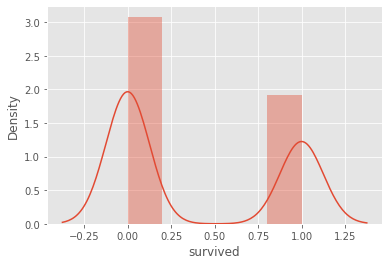

In [ ]:
sns.distplot(data_5['survived'])

In [ ]:
data_5

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,Young,1,0,low,S
1,1,1,female,Adult,1,0,high,C
2,1,3,female,Adult,0,0,medium-low,S
3,1,1,female,Adult,1,0,high,S
4,0,3,male,Adult,0,0,medium-low,S
...,...,...,...,...,...,...,...,...
886,0,2,male,Adult,0,0,medium-low,S
887,1,1,female,Young,0,0,medium,S
888,0,3,female,Adult,1,2,medium,S
889,1,1,male,Adult,0,0,medium,C


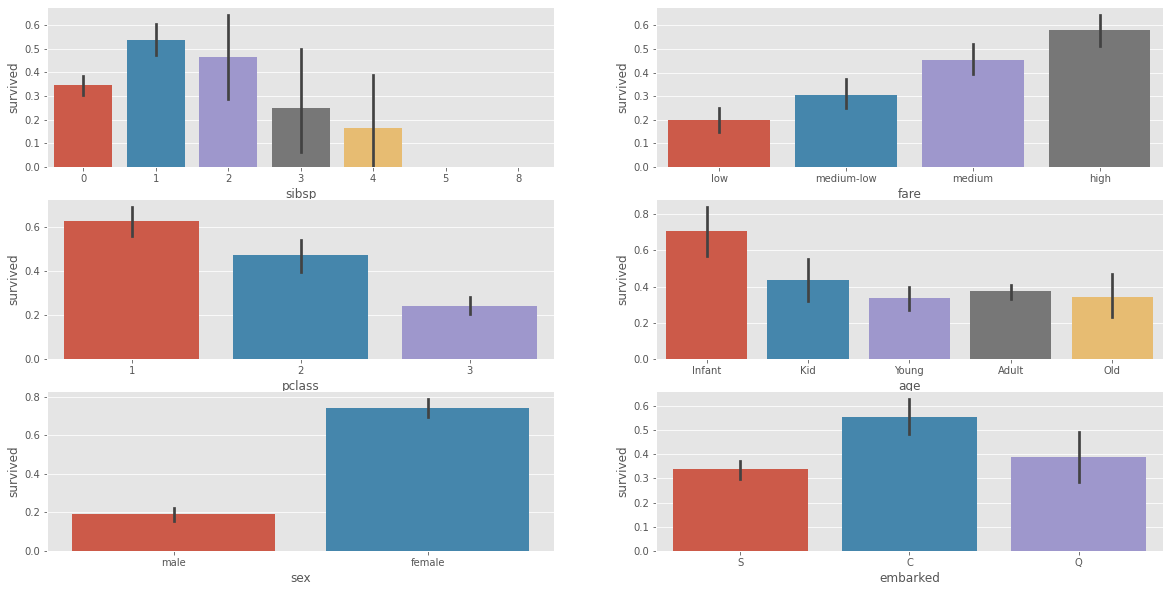

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'sibsp', y = 'survived', data = data_5)
plt.subplot(322)
sns.barplot(x = 'fare', y = 'survived', data = data_5)
plt.subplot(323)
sns.barplot(x = 'pclass', y = 'survived', data = data_5)
plt.subplot(324)
sns.barplot(x = 'age', y = 'survived', data = data_5)
plt.subplot(325)
sns.barplot(x = 'sex', y = 'survived', data = data_5)
plt.subplot(326)
sns.barplot(x = 'embarked', y = 'survived', data = data_5);

In [ ]:
data_5.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,Young,1,0,low,S
1,1,1,female,Adult,1,0,high,C
2,1,3,female,Adult,0,0,medium-low,S
3,1,1,female,Adult,1,0,high,S
4,0,3,male,Adult,0,0,medium-low,S


In [ ]:
dummies = ['fare', 'age', 'embarked', 'sex']
dummy_data = pd.get_dummies(data_5[dummies])

dummy_data.shape

(891, 14)

In [ ]:
data_6 = pd.concat([data_5, dummy_data], axis = 1)
data_6.drop(dummies, axis=1, inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data_6

,survived,pclass,sibsp,parch,fare_low,fare_medium-low,fare_medium,...,age_Adult,age_Old,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,0,3,1,0,1,0,0,...,0,0,0,0,1,0,1
1,1,1,1,0,0,0,0,...,1,0,1,0,0,1,0
2,1,3,0,0,0,1,0,...,1,0,0,0,1,1,0
3,1,1,1,0,0,0,0,...,1,0,0,0,1,1,0
4,0,3,0,0,0,1,0,...,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,...,1,0,0,0,1,0,1
887,1,1,0,0,0,0,1,...,0,0,0,0,1,1,0
888,0,3,1,2,0,0,1,...,1,0,0,0,1,1,0
889,1,1,0,0,0,0,1,...,1,0,1,0,0,0,1


In [ ]:
X = data_6.drop('survived', axis = 1)
y = data_6['survived']
X

,pclass,sibsp,parch,fare_low,fare_medium-low,fare_medium,fare_high,...,age_Adult,age_Old,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,3,1,0,1,0,0,0,...,0,0,0,0,1,0,1
1,1,1,0,0,0,0,1,...,1,0,1,0,0,1,0
2,3,0,0,0,1,0,0,...,1,0,0,0,1,1,0
3,1,1,0,0,0,0,1,...,1,0,0,0,1,1,0
4,3,0,0,0,1,0,0,...,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,1,0,0,...,1,0,0,0,1,0,1
887,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0
888,3,1,2,0,0,1,0,...,1,0,0,0,1,1,0
889,1,0,0,0,0,1,0,...,1,0,1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
# X contains independent values, y contains dependent value

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
accuracy_score(y_pred, y_test)

0.8067796610169492

In [ ]:
confusion_matrix(y_pred, y_test)

array([[158,  31],
       [ 26,  80]])

In [ ]:
svm_report = metrics.classification_report(y_pred, y_test)          
print(svm_report)  

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       189
           1       0.72      0.75      0.74       106

    accuracy                           0.81       295
   macro avg       0.79      0.80      0.79       295
weighted avg       0.81      0.81      0.81       295



문제 37. 여자와 아이에 대한 파생변수를 추가해서 0.85까지 올렸던 코드를 로지스틱 회귀가 아니라 앙상블 기법이 추가된 랜덤포레스트로 수행해서 정확도가 더 올라가는지 확인하시오

In [ ]:
df = sns.load_dataset('titanic')

rdf = df.drop(['deck', 'embark_town'], axis=1)  

rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)

mask = ( rdf.age < 10 ) | ( rdf.sex=='female')
mask.astype(int) # True 를 1 로 변경하고 False 를 0 으로 변경
rdf['women_child'] = mask.astype(int)
rdf

rdf.info()
rdf.head()

'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked','women_child']]
ndf.head()

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
ndf.head()

'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S','women_child']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

'''
[Step 5] 랜덤 포레스트 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 랜덤포레스트 분류 모형 가져오기
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 모형 객체 생성 (kernel='rbf' 적용)
tree_model = RandomForestClassifier( n_estimators=100,
                                                   oob_score=True,
                                                    random_state= 9 )  

# 설명: 적절한 매개변수 C값과 gamma 값을 찾는게 중요한다 
# C 가 너무 크면 훈련 데이터는 잘 분류하지만 오버피팅이 발생하게 된다.
# gamma 매개변수는 결정경계의 곡률을 조정하는 매개변수인데
# gamma 가 너무 크면 훈련 데이터는 잘 분류하지만 오버피팅이 발생 할수
# 있습니다.

# train data를 가지고 모형 학습
tree_model.fit( X_train, y_train )

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = tree_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     714 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  alive        714 non-null    object  
 12  alone        714 non-null    bool    
 13  women_child  714 non-null    int64   
dtypes: bool(2), category(1), float64(2), int64(5), object(4)
memory usage: 69.1+ KB
[[ 0.91123237 -0.53037664  0.52457013 ... -0.20203051  0.53307848
  -0.83424337]
 [-1.47636364  0.57183099  0.52457013 ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
Max value of age column : 80.0
Min value of age column : 0.42
How many 'S' on e

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       188
           1       0.75      0.78      0.76       107

    accuracy                           0.82       295
   macro avg       0.81      0.81      0.81       295
weighted avg       0.83      0.82      0.82       295



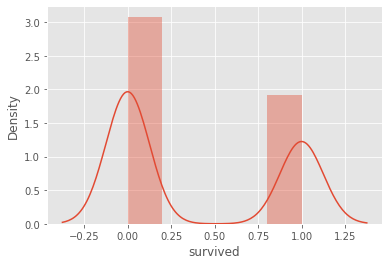

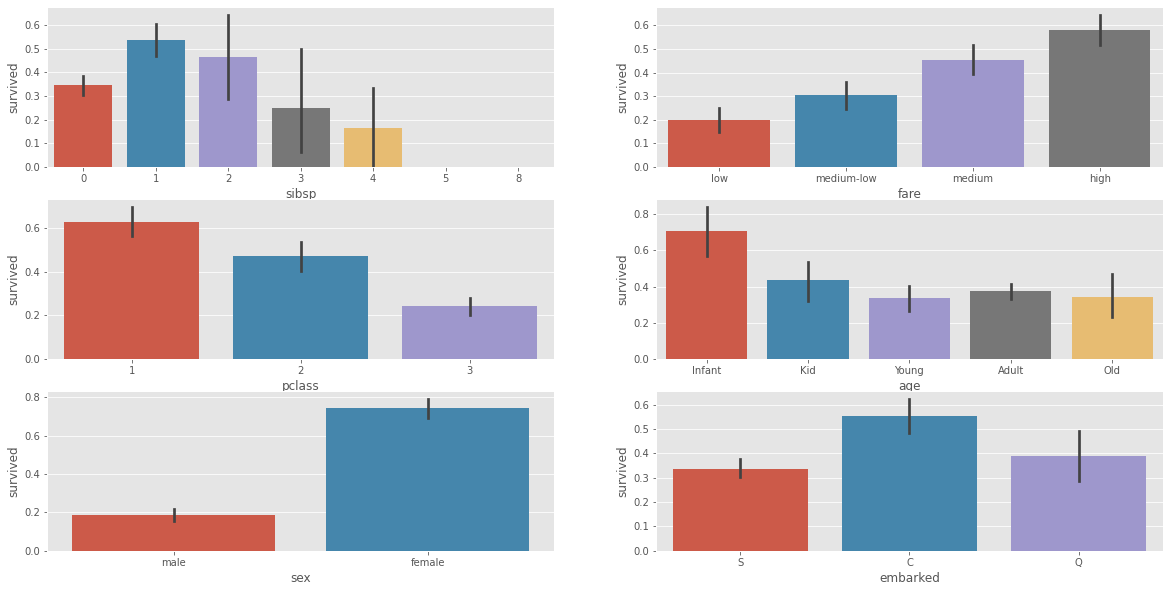

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset # this method will help us to #download the Titanic dataset
%matplotlib inline
plt.style.use('ggplot') # check for more with plt.style.available

data = load_dataset("titanic")
data

data.info()

data.isnull().sum()

columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data_2 = data.drop(columns, axis=1)
data_2

data_2.describe(include='all').T

print(f"Max value of age column : {data_2['age'].max()}")
print(f"Min value of age column : {data_2['age'].min()}")

bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2['age'] = pd.cut(data_2['age'], bins = bins, labels=labels)

pd.DataFrame(data_2['age'].value_counts())

data_2['age'].mode()[0]

data_4 = data_2.fillna({'age' : data_2['age'].mode()[0]})

data_4

data_2['embarked'].unique()

print(f"How many 'S' on embarked column : {data_2[data_2['embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {data_2[data_2['embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {data_2[data_2['embarked'] == 'Q'].shape[0]}")

data_3 = data_2.fillna({'embarked' : 'S'})
data_3

data_4[['pclass', 'survived']].groupby(['pclass']).sum().sort_values(by='survived')

data_4[['sex', 'survived']].groupby(['sex']).sum().sort_values(by='survived')

bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_4['fare'] = pd.cut(data_4["fare"], bins = bins, labels = labels)

pd.DataFrame(data_4['fare'].value_counts())

data_4

data_5 = data_4.drop('class', axis=1)
data_5

sns.distplot(data_5['survived'])

data_5

plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'sibsp', y = 'survived', data = data_5)
plt.subplot(322)
sns.barplot(x = 'fare', y = 'survived', data = data_5)
plt.subplot(323)
sns.barplot(x = 'pclass', y = 'survived', data = data_5)
plt.subplot(324)
sns.barplot(x = 'age', y = 'survived', data = data_5)
plt.subplot(325)
sns.barplot(x = 'sex', y = 'survived', data = data_5)
plt.subplot(326)
sns.barplot(x = 'embarked', y = 'survived', data = data_5);

data_5.head()

dummies = ['fare', 'age', 'embarked', 'sex']
dummy_data = pd.get_dummies(data_5[dummies])

dummy_data.shape

data_6 = pd.concat([data_5, dummy_data], axis = 1)
data_6.drop(dummies, axis=1, inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data_6

X = data_6.drop('survived', axis = 1)
y = data_6['survived']
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
# X contains independent values, y contains dependent value

tree_model = RandomForestClassifier( n_estimators=100,
                                                   oob_score=True,
                                                    random_state= 9 ) 
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
y_pred

accuracy_score(y_pred, y_test)

confusion_matrix(y_pred, y_test)

svm_report = metrics.classification_report(y_pred, y_test)            
print(svm_report)

## Titanic 로지스틱

In [2]:
from sklearn import metrics
import numpy as np

In [7]:
# 1단계 csv ---> 데이터 프레임으로 변환

import pandas as pd
import seaborn as sns

df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# 컬럼이 모두다 출력될 수 있도록 출력할 열의 개수 한도를 늘리기
pd.set_option('display.max_columns',15)


# 2단계 결측치 확인하고 제거하거나 치환한다.
# 2.1 타이타닉 데이터 프레임의 자료형을 확인한다.


mask4 = (df.Age<10) | (df.Sex=='female') 
df['child_women']=mask4.astype(int)

mask = ( df.Fare == 0 ) 
df['male_fare0'] = mask.astype(int)

mask = ( df.Pclass != 3 )
df['male_Third'] = mask.astype(int)

mask = ( df.Age < 50 ) 
df['male_age50'] = mask.astype(int)

print ( df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'child_women',
       'male_fare0', 'male_Third', 'male_age50'],
      dtype='object')


In [11]:
# 2.2 결측치(NaN) 을 확인한다.
# 2.3 deck 컬럼과 embark_town 컬럼을 삭제한다.
# 설명 : deck 결측치가 많아서 컬럼을 삭제해야함.
# embark 와 embark_town 이 같은 데이터여서 embark 컬럼을 삭제해야함

rdf = df.drop(['PassengerId','Cabin','Name','Ticket'], axis =1)
print(rdf)


     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0           0       3    male  22.0      1      0   7.2500        S   
1           1       1  female  38.0      1      0  71.2833        C   
2           1       3  female  26.0      0      0   7.9250        S   
3           1       1  female  35.0      1      0  53.1000        S   
4           0       3    male  35.0      0      0   8.0500        S   
..        ...     ...     ...   ...    ...    ...      ...      ...   
886         0       2    male  27.0      0      0  13.0000        S   
887         1       1  female  19.0      0      0  30.0000        S   
888         0       3  female   NaN      1      2  23.4500        S   
889         1       1    male  26.0      0      0  30.0000        C   
890         0       3    male  32.0      0      0   7.7500        Q   

     child_women  male_fare0  male_Third  male_age50  
0              0           0           0           1  
1              1           0         

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
child_women      0
male_fare0       0
male_Third       0
male_age50       0
dtype: int64

In [14]:
# 2.4 age(나이) 열에 나이가 없는 모든행을 삭제한다.

print(rdf.shape)


rdf['Age'].fillna(31, inplace=True)
print(rdf.shape)

(891, 12)
(891, 12)


In [15]:
# 2.5 embark 열의 NaN 값을 승선도시중 가장 많이 출현한 값으로 치환하기
most_freq = rdf['Embarked'].value_counts().idxmax()
rdf['Embarked'].fillna(most_freq, inplace = True)
rdf.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
child_women    0
male_fare0     0
male_Third     0
male_age50     0
dtype: int64

In [16]:
# 2.6 fare 의 이상치를 제거합니다.

local_std = rdf.Fare.std() * 5
print(local_std)
rdf = rdf[:][ rdf['Fare'] < local_std  ]
print(len(rdf))

248.46714298590453
882


In [18]:
# 3단계 범주형 데이터를 숫자형으로 변환하기
# 3.1 feature selection (분석에 필요한 속성을 선택)
#ndf = rdf[['Survived','Pclass','Sex','Age','Sibsp','Parch','Embarked','child_women']]

ndf = rdf
ndf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,child_women,male_fare0,male_Third,male_age50
0,0,3,male,22.0,1,0,7.2500,S,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,1
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,1,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,0,1,1
887,1,1,female,19.0,0,0,30.0000,S,1,0,1,1
888,0,3,female,31.0,1,2,23.4500,S,1,0,0,0
889,1,1,male,26.0,0,0,30.0000,C,0,0,1,1


In [19]:

# 선택된 컬럼중 2개(sex, embarked) 가 범주형이다.
#3.2 범주형 데이터를 숫자로 변환하기(원핫 인코딩)

gender = pd.get_dummies(ndf['Sex'])
ndf = pd.concat([ndf,gender], axis= 1)
onehot_embarked = pd.get_dummies(ndf['Embarked'])
ndf = pd.concat([ndf,onehot_embarked],axis=1)
ndf.drop(['Sex','Embarked'], axis=1, inplace = True)

print(ndf.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'child_women',
       'male_fare0', 'male_Third', 'male_age50', 'female', 'male', 'C', 'Q',
       'S'],
      dtype='object')


In [20]:
ndf

,Survived,Pclass,Age,SibSp,Parch,Fare,child_women,male_fare0,male_Third,male_age50,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,0,0,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,1,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,1,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,1,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,1,1,1,0,0,0,1
888,0,3,31.0,1,2,23.4500,1,0,0,0,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,0,1,1,0,1,1,0,0


In [21]:

# 4단계 정규화
# 4.1 독립변수와 종속변수(라벨) 을 지정한다.
# survived  pclass   age  sibsp  parch  female  male  C  Q  S
#   라벨                       데이터
# 종속변수                     독립변수

print(ndf.columns)
x = ndf[ ['Fare', 'Pclass', 'Age' ,'SibSp', 'Parch' ,'female' ,'male', 'C' ,'Q' ,'S','child_women', 'male_fare0', 'male_Third',	'male_age50'] ]
#x = ndf[ ['Fare', 'Pclass', 'Age' ,'SibSp', 'Parch' ,'female' ,'male', 'child_women', 'Parch'] ]

y = ndf['Survived'] # 종속변수
print(x)


# 4.2 독립변수들을 정규화 한다.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)
X

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'child_women',
       'male_fare0', 'male_Third', 'male_age50', 'female', 'male', 'C', 'Q',
       'S'],
      dtype='object')
        Fare  Pclass   Age  SibSp  Parch  female  male  C  Q  S  child_women  \
0     7.2500       3  22.0      1      0       0     1  0  0  1            0   
1    71.2833       1  38.0      1      0       1     0  1  0  0            1   
2     7.9250       3  26.0      0      0       1     0  0  0  1            1   
3    53.1000       1  35.0      1      0       1     0  0  0  1            1   
4     8.0500       3  35.0      0      0       0     1  0  0  1            0   
..       ...     ...   ...    ...    ...     ...   ... .. .. ..          ...   
886  13.0000       2  27.0      0      0       0     1  0  0  1            0   
887  30.0000       1  19.0      0      0       1     0  0  0  1            1   
888  23.4500       3  31.0      1      2       1     0  0  0  1            1   
889  30.000

array([[-0.59516721,  0.81758405, -0.61172065, ..., -0.13153341,
        -0.89237549,  0.62894326],
       [ 1.15683863, -1.59415218,  0.6191923 , ..., -0.13153341,
         1.12060451,  0.62894326],
       [-0.57669863,  0.81758405, -0.30399241, ..., -0.13153341,
        -0.89237549,  0.62894326],
       ...,
       [-0.15192136,  0.81758405,  0.08066789, ..., -0.13153341,
        -0.89237549, -1.58996855],
       [ 0.02729225, -1.59415218, -0.30399241, ..., -0.13153341,
         1.12060451,  0.62894326],
       [-0.58148678,  0.81758405,  0.15759995, ..., -0.13153341,
        -0.89237549,  0.62894326]])

In [22]:
# 7단계 테스트 데이터로 예측을 한다.

x_ktest = pd.read_csv("test.csv")
x_ktest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [25]:
mask4 = (x_ktest.Age<10) | (x_ktest.Sex=='female') 
x_ktest['child_women']=mask4.astype(int)
print ( x_ktest.columns)

mask4 = (x_ktest.Age<10) | (x_ktest.Sex=='female') 
x_ktest['child_women']=mask4.astype(int)

mask = ( x_ktest.Fare == 0 ) 
x_ktest['male_fare0'] = mask.astype(int)

mask = ( x_ktest.Pclass != 3 )
x_ktest['male_Third'] = mask.astype(int)

mask = ( x_ktest.Age < 50 ) 
x_ktest['male_age50'] = mask.astype(int)
x_ktest

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'child_women'],
      dtype='object')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child_women,male_fare0,male_Third,male_age50
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0,0,0


In [26]:
# 2.2 결측치(NaN) 을 확인한다.

# 2.3 deck 컬럼과 embark_town 컬럼을 삭제한다.
# 설명 : deck 결측치가 많아서 컬럼을 삭제해야함.
#  embark 와 embark_town 이 같은 데이터여서 embark 컬럼을 삭제해야함

rdf_x_ktest = x_ktest.drop(['PassengerId','Cabin','Name','Ticket'], axis =1)
print(rdf_x_ktest)

     Pclass     Sex   Age  SibSp  Parch      Fare Embarked  child_women  \
0         3    male  34.5      0      0    7.8292        Q            0   
1         3  female  47.0      1      0    7.0000        S            1   
2         2    male  62.0      0      0    9.6875        Q            0   
3         3    male  27.0      0      0    8.6625        S            0   
4         3  female  22.0      1      1   12.2875        S            1   
..      ...     ...   ...    ...    ...       ...      ...          ...   
413       3    male   NaN      0      0    8.0500        S            0   
414       1  female  39.0      0      0  108.9000        C            1   
415       3    male  38.5      0      0    7.2500        S            0   
416       3    male   NaN      0      0    8.0500        S            0   
417       3    male   NaN      1      1   22.3583        C            0   

     male_fare0  male_Third  male_age50  
0             0           0           1  
1             0

In [28]:
# 2.4 age(나이) 열에 나이가 없는 모든행을 삭제한다.
# 데이터가 한개라도 없으면 drop 해라 (how = 'any')

# 모든 데이터가 없으면 drop 해라 (how = 'all')
#rdf_x_ktest = rdf_x_ktest.dropna( subset=['Age'], how='any', axis=0)

#most_freq = rdf_x_ktest['Age'].value_counts(dropna=True).idxmax()  
rdf_x_ktest['Age'].fillna(21, inplace=True)
rdf_x_ktest.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
child_women    0
male_fare0     0
male_Third     0
male_age50     0
dtype: int64

In [30]:
# 2.6 fare 열의 NaN 값을 요금중 가장 많이 출현한 값으로 치환하기
most_freq = rdf_x_ktest['Fare'].value_counts().idxmax()
rdf_x_ktest['Fare'].fillna(most_freq, inplace = True)
rdf_x_ktest.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
child_women    0
male_fare0     0
male_Third     0
male_age50     0
dtype: int64

In [32]:
# 3단계 범주형 데이터를 숫자형으로 변환하기
# 3.1 feature selection (분석에 필요한 속성을 선택)
#ndf = rdf[['Survived','Pclass','Sex','Age','Sibsp','Parch','Embarked','child_women']]

ndf_x_ktest = rdf_x_ktest
ndf_x_ktest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,child_women,male_fare0,male_Third,male_age50
0,3,male,34.5,0,0,7.8292,Q,0,0,0,1
1,3,female,47.0,1,0,7.0000,S,1,0,0,1
2,2,male,62.0,0,0,9.6875,Q,0,0,1,0
3,3,male,27.0,0,0,8.6625,S,0,0,0,1
4,3,female,22.0,1,1,12.2875,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,21.0,0,0,8.0500,S,0,0,0,0
414,1,female,39.0,0,0,108.9000,C,1,0,1,1
415,3,male,38.5,0,0,7.2500,S,0,0,0,1
416,3,male,21.0,0,0,8.0500,S,0,0,0,0


In [33]:
# 선택된 컬럼중 2개(sex, embarked) 가 범주형이다.
#3.2 범주형 데이터를 숫자로 변환하기(원핫 인코딩)
gender = pd.get_dummies(ndf_x_ktest['Sex'])
ndf_x_ktest = pd.concat([ndf_x_ktest,gender], axis= 1)
onehot_embarked = pd.get_dummies(ndf_x_ktest['Embarked'])
ndf_x_ktest = pd.concat([ndf_x_ktest,onehot_embarked],axis=1)
ndf_x_ktest.drop(['Sex','Embarked'], axis=1, inplace = True)

In [35]:
# 4단계 정규화
# 4.1 독립변수와 종속변수(라벨) 을 지정한다.
# survived  pclass   age  sibsp  parch  female  male  C  Q  S
#   라벨                       데이터
# 종속변수                     독립변수
print(ndf_x_ktest.columns)
x = ndf_x_ktest[ ['Fare','Pclass', 'Age' ,'SibSp', 'Parch' ,'female' ,'male', 'C' ,'Q' ,'S', 'child_women','male_fare0', 'male_Third', 'male_age50'] ]
#x = ndf_x_ktest[ ['Fare','Pclass', 'Age' ,'SibSp', 'Parch' ,'female' ,'male', 'child_women','Parch'] ]

print ( x.isnull().sum( axis=0)  )  

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'child_women', 'male_fare0',
       'male_Third', 'male_age50', 'female', 'male', 'C', 'Q', 'S'],
      dtype='object')
Fare           0
Pclass         0
Age            0
SibSp          0
Parch          0
female         0
male           0
C              0
Q              0
S              0
child_women    0
male_fare0     0
male_Third     0
male_age50     0
dtype: int64


In [36]:
# 4.2 독립변수들을 정규화 한다.
from sklearn import preprocessing
X_test = preprocessing.StandardScaler().fit(x).transform(x)
print(len(X))
print(X.shape)
print(X_test.shape)

882
(882, 14)
(418, 14)


In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit( X, y)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# 7단계 테스트 데이터로 예측을 한다.

y_hat = lr.predict( X_test )
print(y_hat)

for  i,a  in  enumerate(y_hat):
    print (str(i+892) + ',' + str(a))


[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,1
911,1
912,0
913,1
914,1
915,1
916,1
9

In [41]:
test_id = x_ktest.PassengerId
pred = y_hat

submission = pd.DataFrame({'PassengerId': test_id, 'Survived': pred})
submission.to_csv('submission_result2.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


로지스틱 회귀 모델: 0.77033